# Lab 2: Clipping

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package
import librosa as lr

## PART 1 - Standard Clipper

In [119]:
def clipper(x,th):
    '''Clips the signal at a specific threshold
    
    Parameters
    ----------
    x : of type np.ndarray
        The input signal in an array
        
    th : > 0
        The clipping threshold
        
    Returns
    -------
    y : of type np.ndarray
        Clipped audio
    '''
    
    #Normalize amplitude of signal to 1
    N = len(x)
    y = np.zeros(N)
    max_x = 0
    for i in range(N):
        if abs(x[i]) > max_x:
            max_x = abs(x[i])
            
        max_amplitude = 1
    for i in range(N):
        x[i] = x[i] * max_amplitude / max_x
    
    #Set thresholdef
    for n in range(N):
        if x[n] >= th:
            y[n] = th
        elif x[n] <= -th:
            y[n] = -th 
        else:
            y[n] = x[n]
    
    return y

## Test your clipper

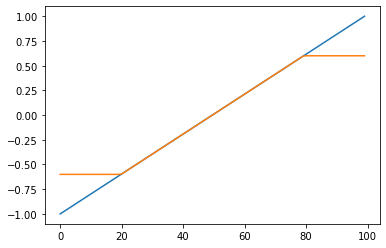

In [120]:
inp = np.linspace(-1,1,100)
plt.plot(inp)
plt.plot(clipper(inp,0.6))

## PART 3 - Try your Clipper below with a real audio file

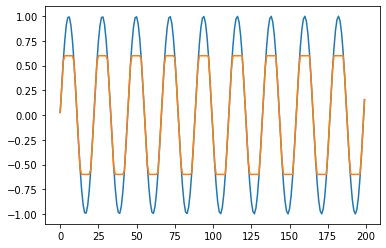

In [121]:
x,sr = lr.load('1kHz_Sinewave_48k.wav')
x_clip = clipper(x,0.6)


plt.plot(x[0:200])
plt.plot(x_clip[0:200])
Audio(x_clip, rate=48000)

## PART 3 - Asymmetric Clipper

In [122]:
def asymmetric_clipper(x,th,asymmetry):
    '''Performs asymmetric clipping based on the asymmetry parameter

        Parameters
        ----------
        x : of type np.ndarray
            The input signal in an array

        th : > 0
            The clipping threshold
        
        asymmetry
            Defines the percentage of asymmetry between positive and negative samples. 1 is totally symmetric,
            0 is only positive samples

        Returns
        -------
        y : of type np.ndarray
            Clipped audio
        '''
    #Paste your code from above here
     
    N = len(x)
    y = np.zeros(N)
    max_x = 0
    for i in range(N):
        if abs(x[i]) > max_x:
            max_x = abs(x[i])
            
        max_amplitude = 1
    for i in range(N):
        x[i] = x[i] * max_amplitude / max_x
    
    for n in range(N):
        if x[n] >= th:
            y[n] = th
        elif x[n] <= -asymmetry*th:
            y[n] = -asymmetry*th
        else:
            y[n] = x[n]

    return y

# Test your clipper

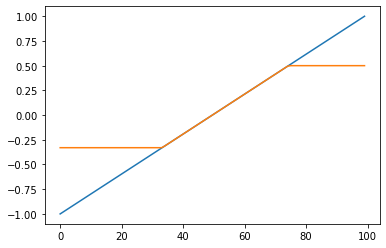

In [126]:
inp = np.linspace(-1,1,100)
plt.plot(inp)
plt.plot(asymmetric_clipper(x=inp,th=0.5,asymmetry=0.66))


# Experiment
- Try different degrees of asymetry, observe the frequency graph below and listen to the result. Then answer the following:
    - How did the frequency spectrum changed when the clipper became more asymetric?
    - How did the sound change when the clipper became more asymetric?

Text(0.5, 1.0, 'Frequency Plot')

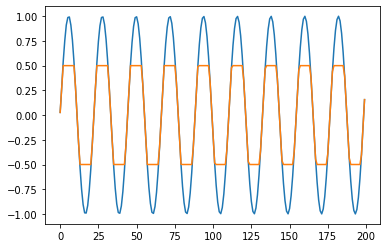

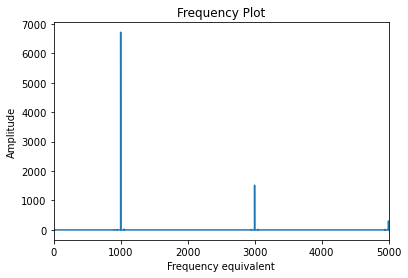

In [150]:
#Sine
sine,sr = lr.load('1kHz_Sinewave_48k.wav')
y = asymmetric_clipper(sine,0.5,1)
plt.figure(1)
plt.plot(sine[0:200])
plt.plot(y[0:200])


#FFT
plt.figure(2)
plt.plot(np.abs(np.fft.fft(y)))
plt.xlim([0,5000])
plt.xlabel('Frequency equivalent')
plt.ylabel('Amplitude')
plt.title('Frequency Plot')

In [151]:
#Play different degrees of asymmetry in this cell.
Audio(y,rate=sr)

# Answer the questions below:

1. How did the frequency spectrum changed when the clipper became more asymetric?
    - As the clipper became more asymetric you got more and higher amplitude harmonics in the frequency spectrum.
2. How did the sound change when the clipper became more asymetric?
    - The more asymetric the clipper became you could a higher pitched humming harmonic on top of the first harmonic.


# Extended Assignment - Overdrive

In [132]:
def OD(x,pre_gain):
    '''Audio overdrive function.

        Parameters
        ----------
        x : of type np.ndarray
            The input signal in an array
        
        pre_gain:
            Boosts the signal’s amplitude before the OD takes place to emphasize its effect (x*pre_gain)

        Returns
        -------
        y : of type np.ndarray
            Driven audio
    '''
    N = len(x)
    y = np.zeros(N)
    for i in range(N):
        if 0<=x[i]<=1/3:
            y[i] = 2*x[i]*pre_gain
        elif 1/3<=x[i]<=2/3:
            y[i] = (3-(2-3*x[i]*pre_gain)**2)/3 
        elif 2/3<=x[i]<=1:
            y[i] = 1 
        
    return y

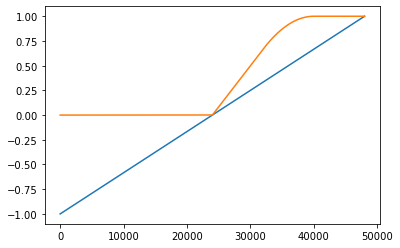

In [133]:
inp = np.linspace(-1,1,48000)
plt.plot(inp)
plt.plot(OD(inp, 1))

Text(0.5, 1.0, 'Frequency Plot')

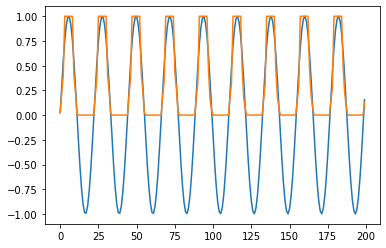

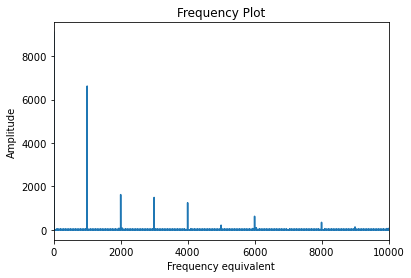

In [135]:
#Sine
sine,sr = lr.load('1kHz_Sinewave_48k.wav')
plt.figure()
plt.plot(sine[0:200])
plt.plot(OD(sine, 0.4)[0:200])
#FFT
plt.figure()
plt.plot(np.abs(np.fft.fft(OD(x=sine,pre_gain=1))))
plt.xlim([0,10000])
plt.xlabel('Frequency equivalent')
plt.ylabel('Amplitude')
plt.title('Frequency Plot')

In [117]:
#Play back audio using your OD in this cell
Audio(OD(sine,1),rate=sr)